# Gradient Descent with Linear Regression -  Example 2

## Predicting the height of young children using their age

Suppose we want to predict a child's height (centimeters) from their age (years).  We have data giving measurements of heights for various children between the ages of two and eight. The $y$-values are the heights measured in centimeters, and the $x$-values are the ages of the children corresponding to the heights.

Each height and age tuple constitutes one training sample  $(x^{(i)}, y^{(i)})$ in our dataset. There are $N = 114$ training samples, and we will use them to develop a linear regression model.  Since our age data is one-dimensional, the objective function (here, mean squared error (MSE)), $D_{MSE}$ is

$$\begin{align}
D_{MSE}(\theta_0, \theta_1) &= \frac{1}{N}||\theta_1 x + \theta_0 - y||^2\\
 &= \frac{1}{N}\sum_{k=1}^N (\theta_1 x^k + \theta_0 - y^k)^2.
\end{align}$$


The gradient of $D_{MSE}$ is

$$\nabla D_{MSE} (\theta_0, \theta_1) =
\frac{1}{N}\Big(2\sum_{k=1}^N({\theta_1 x^k + \theta_0 - y^k),2\sum_{k=1}^N x^k(\theta_1 x^k + \theta_0 - y^k)}\Big).
$$

First, let us take a look at our data.

In [ ]:
#------------------------
# Import package
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Plot style
plt.style.use('seaborn-whitegrid')

#------------------------
# Make dataframe
#------------------------

# Creates a dataframe from file called Height-Weight-Data.csv
url = 'https://raw.githubusercontent.com/cedholm/M32-Gradient-descent-methods-in-machine-learning/main/Height-Weight-Data.csv'
df = pd.read_csv(url)

# Prints first 5 lines of data
print(df.head(5))

# Print basic stats on data
print(df.describe())

<ipython-input-7-7c10f04a0602>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


   height     weight  age  male
0  105.41  13.947954  8.0     0
1   86.36  10.489315  6.5     0
2  109.22  15.989118  7.0     0
3  121.92  20.411640  8.0     1
4   97.79  13.267566  5.0     0
           height      weight         age        male
count  114.000000  114.000000  114.000000  114.000000
mean    91.424444   12.636088    3.829825    0.482456
std     17.740952    4.191880    2.651563    0.501898
min     53.975000    4.252425    0.000000    0.000000
25%     78.581250    9.213587    1.000000    0.000000
50%     91.440000   12.700576    3.500000    0.000000
75%    105.410000   15.776497    6.000000    1.000000
max    123.190000   23.218241    8.900000    1.000000


We want to look at the relationship between age and height.

###  Part 1

Implement the gradient descent algorithm using a learning rate of $\gamma = 0.01$ with the code below.

Initialize the parameters to $\boldsymbol{\theta} = \mathbf{0}$, and run one iteration of gradient descent from this initial starting point. Record the value of of $\theta_0$ and $\theta_1$ that you get after this first iteration.


In [8]:
#------------------------
# Create functions
#------------------------

# Create the function we want to minimumize
# Here, we have f = D(theta0, theta1) = \sum_{k=1}^N (\theta_1 x^k + \theta_0 - y^k)^2
def f(x,y, Theta):
    theta0, theta1 = Theta
    f = sum((theta1*x + theta0 - y)**2)
    return f

# Create the gradient vector
# Here, we have \nabla D = 2\sum_{k=1}^N (\theta_1 x_k + \theta_0 - y_k)*<1, x_k>
def gradf(x,y, Theta):
    # divide up thetas
    theta0, theta1 = Theta
    N = len(x)
    # find derivatives w.r.t each theta
    deriv_theta0 = 2/N*sum(theta1*x + theta0 - y)
    deriv_theta1 = 2/N*sum(x*(theta1*x + theta0 - y))
    # put in vector form
    gradient = np.array([deriv_theta0, deriv_theta1])
    return gradient

#------------------------
# Create variables
#------------------------

# Data to import into functions
x = df['age'].values
y = df['height'].values

# Starting point
theta0 = 0
theta1 = 0

# Step size to move along gradient
gamma = 0.01

# Starting values of theta vector
initialTheta = np.array([theta0,theta1])

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 1
# how close we want to be to f
tolerance = 0.000001
# initial difference between old and new theta values
diff = 100

# initial theta values to starting point
currentTheta = initialTheta

# initialize value of objective function
currentfValues = f(x, y, initialTheta)

#------------------------
# Initialize lists
#------------------------

# creates list of all theta pairs
thetaValuesList = [currentTheta]
# creates list of all distance function values
fValuesList = [currentfValues]
# creates list of the norm between old and new theta values
diffList = [diff]

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):

    # Calculate new theta values - move along gradient to new theta position
    updatedTheta = currentTheta - gamma*gradf(x, y, currentTheta)

    # Calculate new function values with new theta values
    updatedfValues = f(x,y, updatedTheta)

    # Calculate the difference between current and new theta values
    #diff = norm(updatedTheta-currentTheta,2)
    diffList.append(diff)

    # Add 1 to counter for total number of steps
    totalNumSteps += 1

    # Add to list of theta values
    thetaValuesList.append(updatedTheta)
    # Add to list of f function values
    fValuesList.append(updatedfValues)

    # Reassign current theta vector to new theta vector
    currentTheta = updatedTheta
    # Reassign current f values to new f values
    currentfValues = updatedfValues

print('Our theta_0 value after', totalNumSteps, 'timestep is', thetaValuesList[-1][0])
print('Our theta_1 value after', totalNumSteps, 'timestep is',  thetaValuesList[-1][1])

Our theta_0 value after 1 timestep is 1.8284888771929824
Our theta_1 value after 1 timestep is 7.82862431578947


Did you get $\theta_0 = 1.8285$ and $\theta_1 = 7.8286$?

### Part 2

Continue running gradient descent for more iterations until $\theta$ converges. This will take a total of about 4000 iterations. After convergence, record the final values of $\theta_0$ and $\theta_1$.


In [9]:
#------------------------
# Create functions
#------------------------

# Create the function we want to minimumize
#------------------------
# Here, we have f = D(theta0, theta1) = \sum_{k=1}^N (\theta_1 x^k + \theta_0 - y^k)^2

def f(x,y, Theta):
    theta0, theta1 = Theta
    f = sum((theta1*x + theta0 - y)**2)
    return f

# Create the gradient vector
#------------------------
# Here, we have \nabla D = 2\sum_{k=1}^N (\theta_1 x_k + \theta_0 - y_k)*<1, x_k>

def gradf(x,y, Theta):
    # divide up thetas
    theta0, theta1 = Theta
    N = len(x)
    # find derivatives w.r.t each theta
    deriv_theta0 = 2/N*sum(theta1*x + theta0 - y)
    deriv_theta1 = 2/N*sum(x*(theta1*x + theta0 - y))
    # put in vector form
    gradient = np.array([deriv_theta0, deriv_theta1])
    return gradient

#------------------------
# Create variables
#------------------------

# Data to import into functions
x = df['age'].values
y = df['height'].values

# Starting point
theta0 = 0
theta1 = 0

# Step size to move along gradient
gamma = 0.01

# Starting values of theta vector
Theta = np.array([theta0,theta1])

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 5000
# how close we want to be to f
tolerance = 0.000001
# initial difference between old and new theta values
diff = 100

#------------------------
# Initialize lists
#------------------------

# creates list of all theta pairs
thetaValuesList = [Theta]
# creates list of all distance function values
fValuesList = [f(x,y,Theta)]
# creates list of the norm between old and new theta values
diffList = [diff]

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):

    # Calculate new (x,y) values - move along gradient to new (x,y) position
    newTheta = Theta - gamma*gradf(x,y,Theta)
    # Add to list of (x,y) values
    thetaValuesList.append(newTheta)

    # Calculate the difference between current and new (x,y) values
    diff = norm(newTheta-Theta,2)
    diffList.append(diff)

    # Reassign current (x,y) to new (x,y)
    Theta = newTheta
    # Add to list of f function values
    fValuesList.append(f(x,y,Theta))

    # Add 1 to counter for total number of steps
    totalNumSteps += 1


print('Our theta_0 value after', totalNumSteps, 'time steps is', thetaValuesList[-1][0])
print('Our theta_1 value after', totalNumSteps, 'time steps is',  thetaValuesList[-1][1])

Our theta_0 value after 2067 time steps is 68.7327662095295
Our theta_1 value after 2067 time steps is 5.924978663906932


### Part 3

When you have found $\boldsymbol{\theta}$, plot the straight line fit from your algorithm on the same graph as your training data.

Note that for most machine learning problems, $x$ is very high dimensional, so we may not be able to plot the prediction.  However, in this example, we have only one feature (age).  Being able to plot this gives a nice sanity-check on our result.

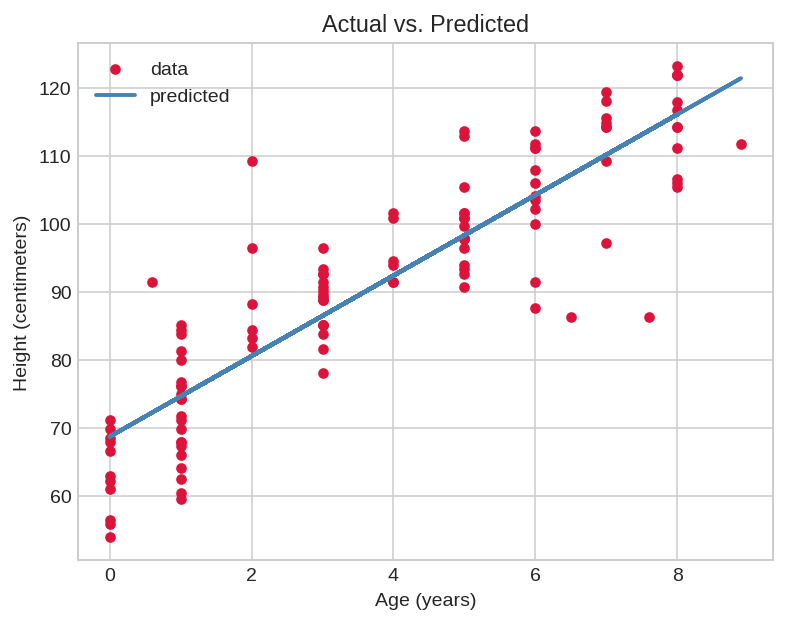

In [10]:
#------------------------
# Compute function to plot
#------------------------

# Get our theta values from above
theta0, theta1 = thetaValuesList[-1]

# Create a line with those values
predHeight = theta1 * x + theta0

#------------------------
# Create plot
#------------------------

# Make figure size
fig = plt.figure(dpi = 140)\

# Plot data
#------------------------

# Plot df data
df.plot(x = 'age', y = 'height', kind = 'scatter', color = 'crimson', s = 20, label = 'data', ax = plt.gca())

# Plot line we found
plt.plot(x, predHeight, marker = '', color = 'steelblue', label = 'predicted', lw = 2)

# Label figure
plt.xlabel('Age (years)')
plt.ylabel('Height (centimeters)')
plt.title('Actual vs. Predicted')

# Add legend
#------------------------
plt.legend()

# Uncommment to save figure
#------------------------
plt.savefig('actualVsPredicted.pdf', bbox_inches='tight', dpi= 300)

# Show the plot
#------------------------
plt.show()

### Part 4

Finally, we'd like to make some predictions using the learned hypothesis. We will use the model to predict the height for a two boys of age 3.5 and age 7.

In [11]:
#------------------------
# Predict height funtion
#------------------------
def predictedHeight(age, Theta):
    theta0, theta1 = Theta
    predictedHeight = theta1 * age + theta0
    return predictedHeight

# Find predictions
#------------------------

# Age 3.5
age = 3.5
print('A boy of age', age,'has predicted height %.3f' %predictedHeight(age, thetaValuesList[-1]), 'centimeters.')

# Age 7
age = 7
print('A boy of age', age,'has predicted height %.3f' %predictedHeight(age, thetaValuesList[-1]), 'centimeters.')

A boy of age 3.5 has predicted height 89.470 centimeters.
A boy of age 7 has predicted height 110.208 centimeters.
